In [1]:
from numpy import pi

# importing Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
bin(5)

'0b101'

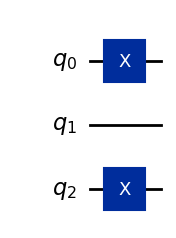

In [3]:
# Create the circuit
qc = QuantumCircuit(3)

# Encode the state 5
qc.x(0)
qc.x(2)
qc.draw('mpl')

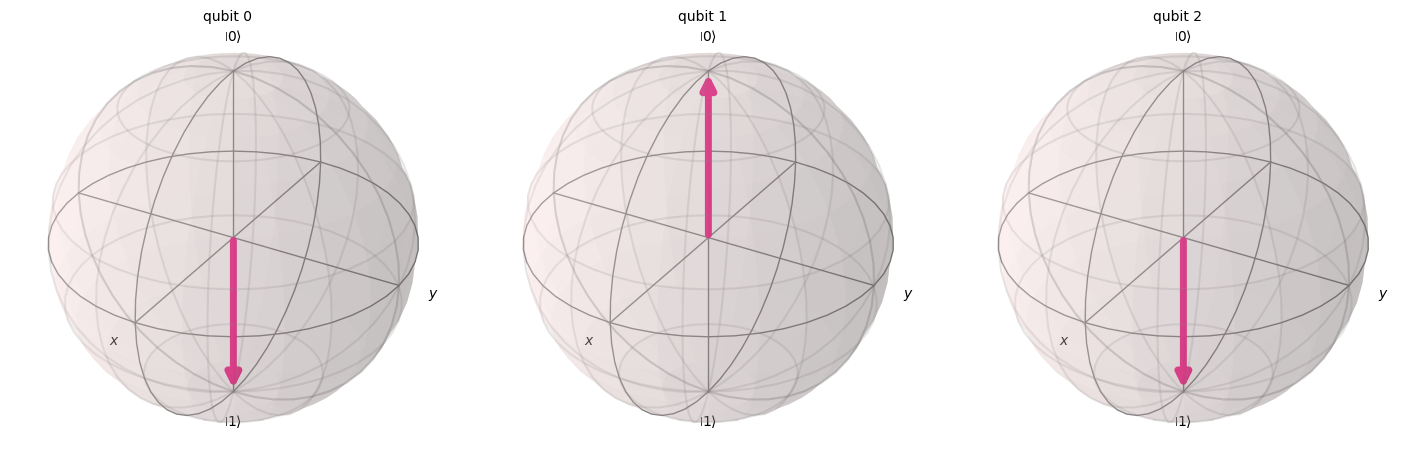

In [4]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

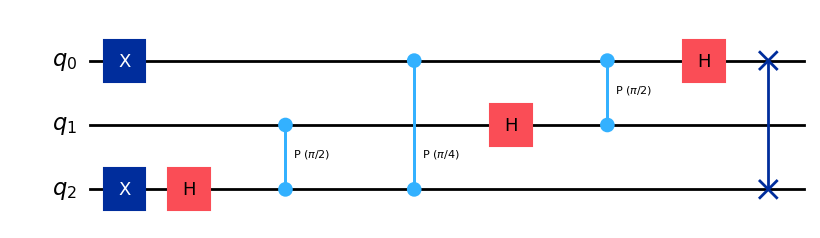

In [5]:
qc.h(2)
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.swap(0,2)
qc.draw('mpl')

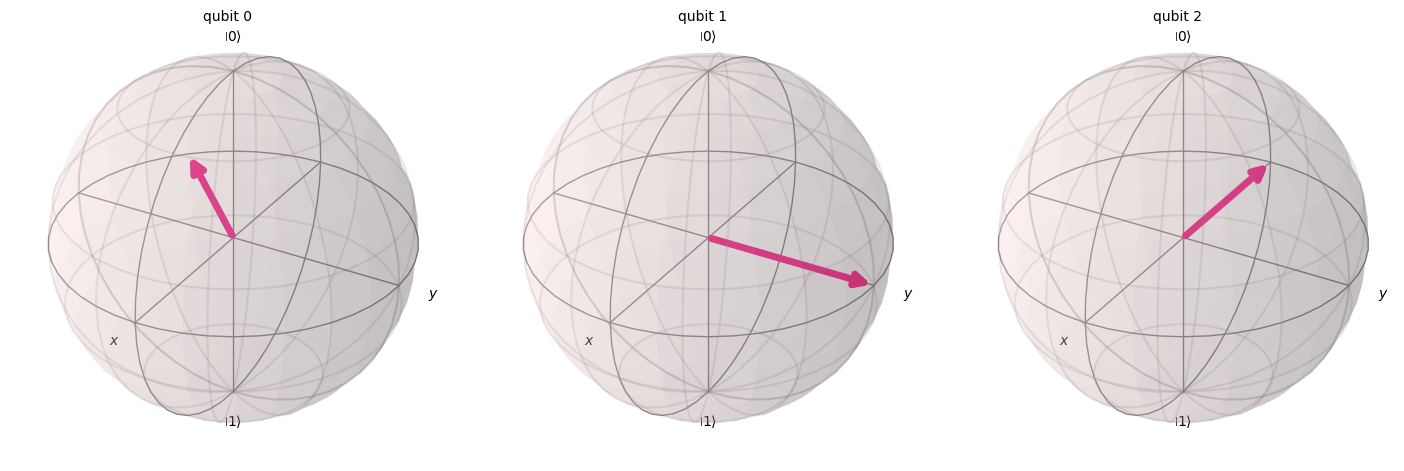

In [6]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

In [7]:
# Comment to picture above
# We can see out QFT function has worked correctly. Compared the state {zero in QFT basis}|0^~)=|+++>, 
# Qubit 0 has been rotated by  5/8 of a full turn, and
# qubit 1 has been rotated by 10/8 full turns (equivalent to 1/4 of a full turn), 
# qubit 2 has been rotated by 20/8 full turns (equivalent to 1/2 of a full turn).

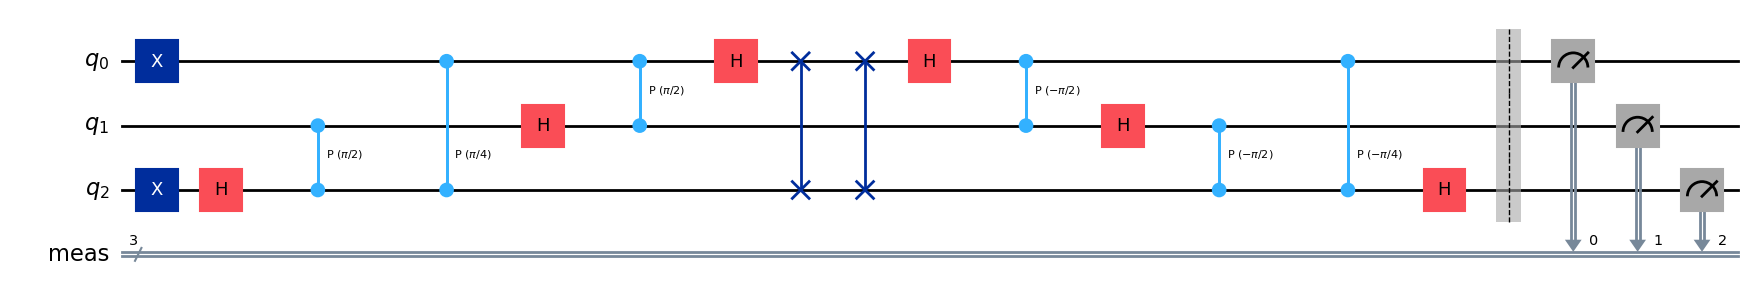

In [8]:
# normal QFT
qc=QuantumCircuit(3)
qc.x(0)
qc.x(2)
qc.h(2)
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.swap(0,2)
# inverse QFT
qc.swap(0,2)
qc.h(0)
qc.cp(-pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(1)
qc.cp(-pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(-pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(2)
qc.measure_all()
qc.draw('mpl')

In [9]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)

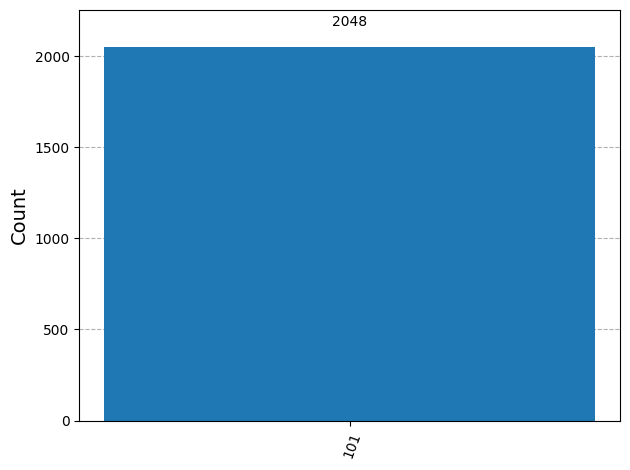

In [10]:
counts = job.result().get_counts()
plot_histogram(counts)

In [11]:
# create the bin 3 - make a QFT 
# first encode a number in the computational basis

In [12]:
bin(3)

'0b11'

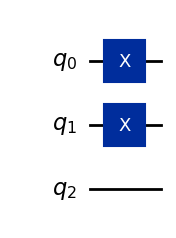

In [13]:
# The number 3 in binary is 110. Let's encode this into our qubits:
# Create the circuit
qc = QuantumCircuit(3)

# Encode the state 5
qc.x(0)
qc.x(1)
qc.draw('mpl')

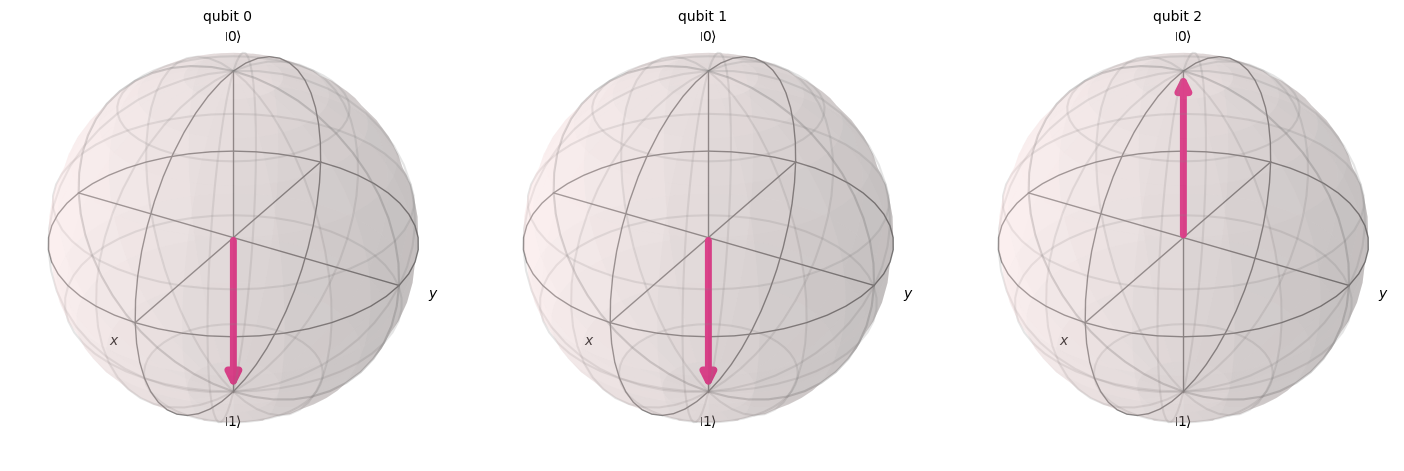

In [14]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

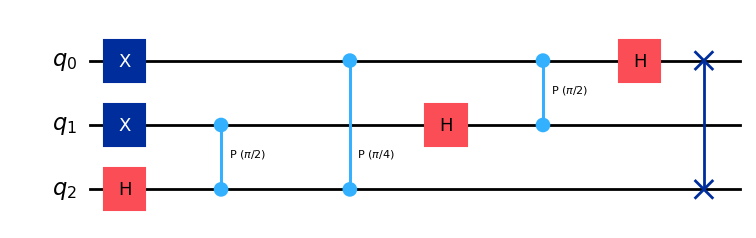

In [15]:
# create QFT circuit 
qc=QuantumCircuit(3)
qc.x(0)
qc.x(1)
qc.h(2)
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.swap(0,2)
qc.draw('mpl')

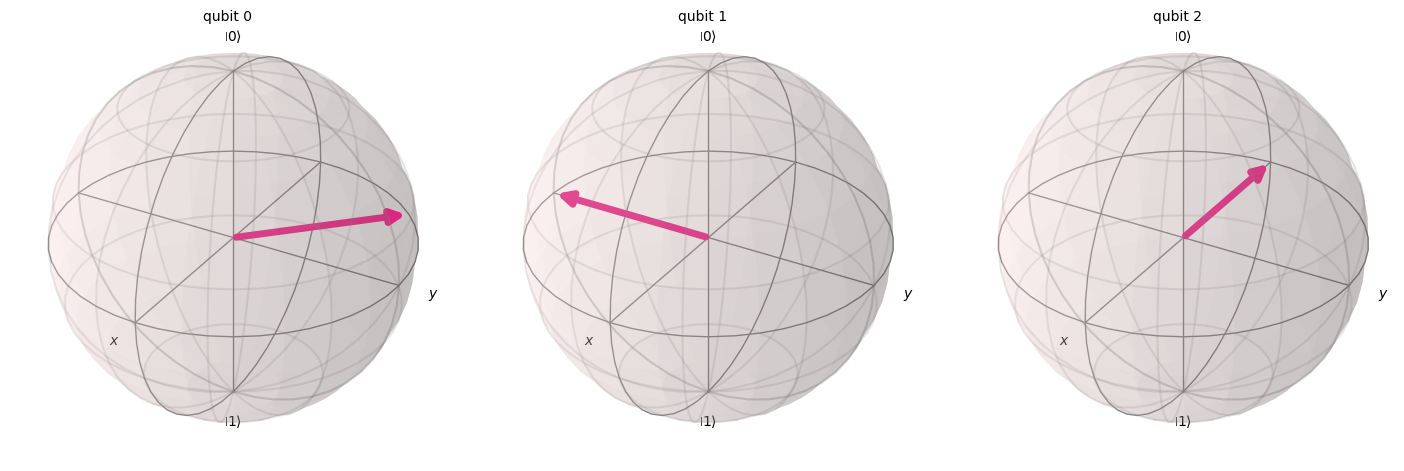

In [16]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

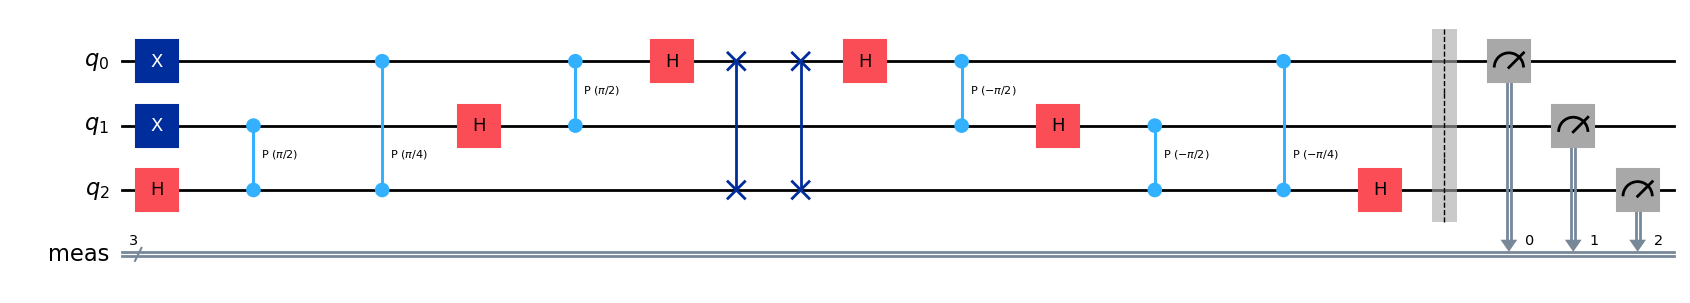

In [17]:
# create QFT circuit 
qc=QuantumCircuit(3)
qc.x(0)
qc.x(1)
qc.h(2)
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.swap(0,2)
# inverse QFT
qc.swap(0,2)
qc.h(0)
qc.cp(-pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(1)
qc.cp(-pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(-pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(2)
qc.measure_all()
qc.draw('mpl')

In [18]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
#job_monitor(job)

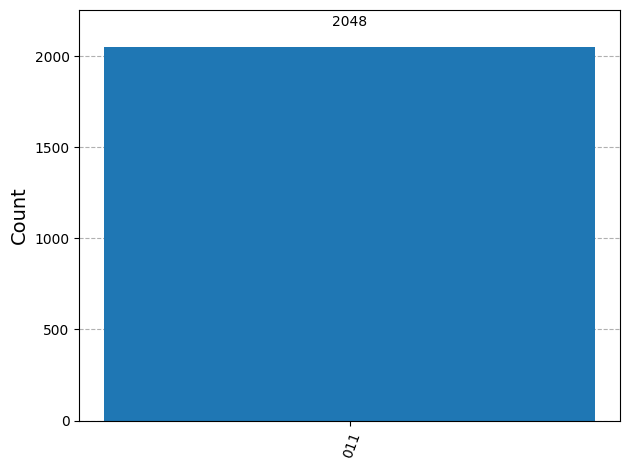

In [19]:
counts = job.result().get_counts()
plot_histogram(counts)

In [24]:
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
import numpy as np

In [44]:
def encode_big_endian(binary_string):
    n = len(binary_string)
    qc = QuantumCircuit(n)
    for i, bit in enumerate(binary_string):
        if bit == '1':
            qc.x(i)  # MSB → qubit 0
    return qc

def qft_big_endian(qc, qubits, inverse=False):
    n = len(qubits)
    if not inverse:
        for j in reversed(range(n)):
            qc.h(qubits[j])
            for k in reversed(range(j)):
                qc.cp(np.pi / 2**(j - k), qubits[k], qubits[j])
    else:  # Inverse QFT
        for j in range(n):
            for k in range(j):
                qc.cp(-np.pi / 2**(j - k), qubits[k], qubits[j])
            qc.h(qubits[j])
    # Swap qubits to finalize QFT
    for i in range(n // 2):
        qc.swap(qubits[i], qubits[n - 1 - i])
    return qc


def recursive_qft_big_endian(qc, qubits):
    if len(qubits) == 0:
        return
    target = qubits[-1]
    qc.h(target)
    for i, ctrl in enumerate(qubits[:-1]):
        qc.cp(np.pi / 2**(len(qubits)-1-i), ctrl, target)
    recursive_qft_big_endian(qc, qubits[:-1])

def build_recursive_qft(n_qubits):
    qc = QuantumCircuit(n_qubits)
    qubits = list(range(n_qubits))
    recursive_qft_big_endian(qc, qubits)
    for i in range(n_qubits // 2):
        qc.swap(i, n_qubits - 1 - i)
    return qc



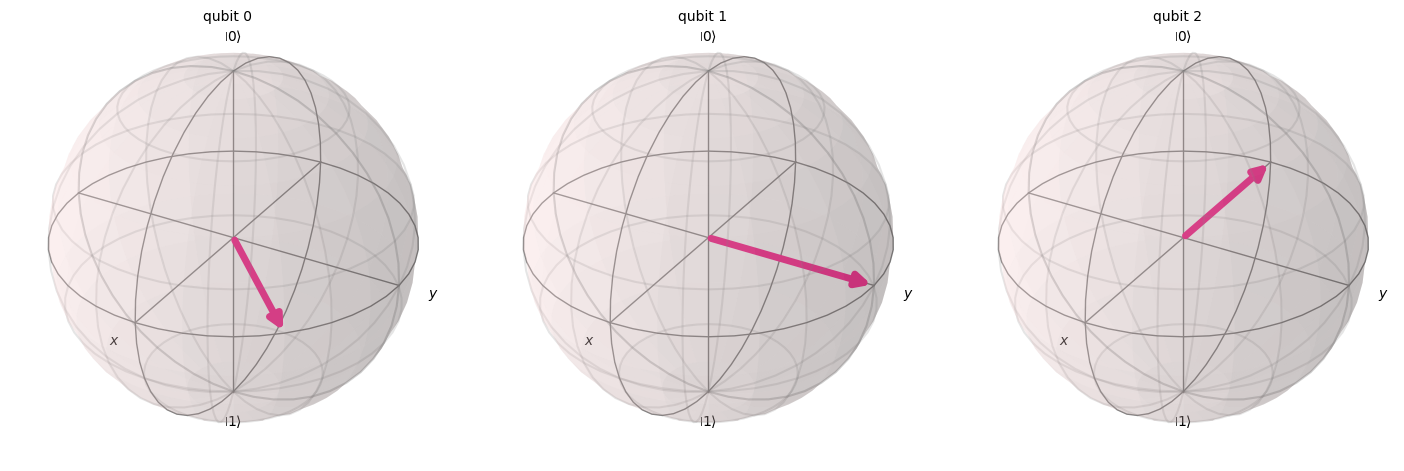

In [ ]:
def qft_inverse_statevector(binary_string):
    n = len(binary_string)
    qc = encode_big_endian(binary_string)
    qft_big_endian(qc, list(range(n)))
    qc.save_statevector()
    return sim.run(qc).result().get_statevector()

# |a⟩ such that QFT†|a⟩ = |100⟩
state_a = qft_inverse_statevector("100")
plot_bloch_multivector(state_a)

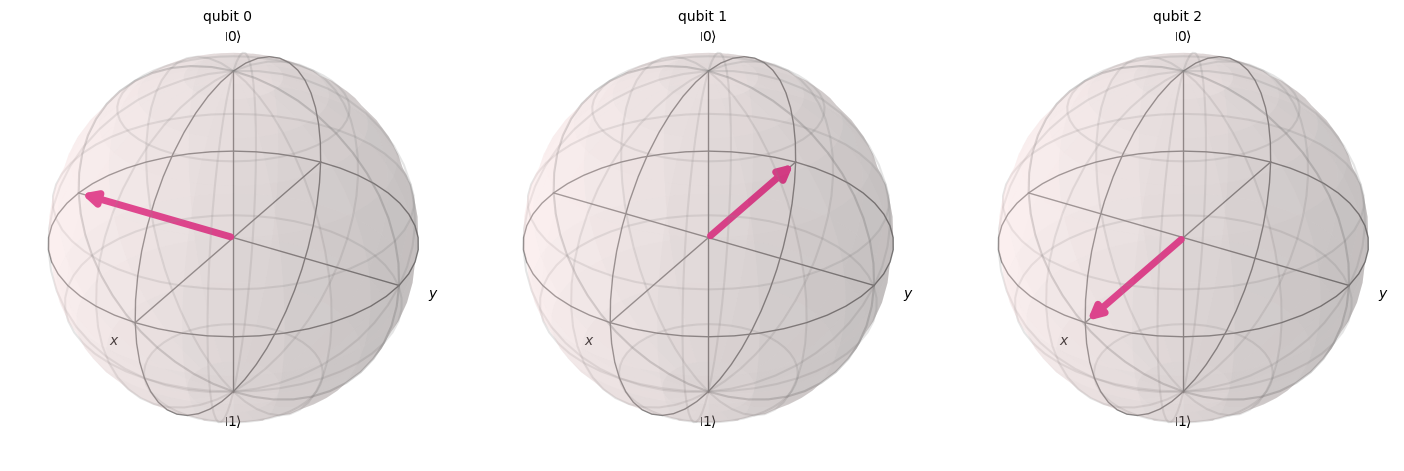

In [ ]:
# |b⟩ such that QFT†|b⟩ = |011⟩
state_b = qft_inverse_statevector("011")
plot_bloch_multivector(state_b)

In [52]:
for state in ['000','001','010','011','100','101','110','111']:
    qc = encode_big_endian(state)
    qft_big_endian(qc, [0,1,2])
    qc.save_statevector()
    sv = sim.run(qc).result().get_statevector()
    print(f"QFT of |{state}⟩:")
    fig = plot_bloch_multivector(sv)
    fig.savefig(f"outputs/QFT_{state}.png")

QFT of |000⟩:
QFT of |001⟩:
QFT of |010⟩:
QFT of |011⟩:
QFT of |100⟩:
QFT of |101⟩:
QFT of |110⟩:
QFT of |111⟩:


In [58]:
for n_qubits in range(1, 9):
    qc = build_recursive_qft(n_qubits)
    qc.save_statevector()
    sv = sim.run(qc).result().get_statevector()
    print(f"Recursive QFT statevector for {n_qubits} qubits:\n{sv}\n")

Recursive QFT statevector for 1 qubits:
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))

Recursive QFT statevector for 2 qubits:
Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))

Recursive QFT statevector for 3 qubits:
Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))

Recursive QFT statevector for 4 qubits:
Statevector([0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
            dims=(2, 2, 2, 2))

Recursive QFT statevector for 5 qubits:
Statevector([0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
      